# Exploring the dataframe

The goal of this notebook is to show how to use the dataframe. Please, feel free to send me your questions or suggestions to my email account: eder_rdz_mtz@hotmail.com, I may read them ;)

## Load the master_df

The master_df is the dataframe that contains all the columns. This dataframe is for developers use only; otherwise, the public_df should be used.  

If you don't have already the master_df, send me an email to: eder_rdz_mtz@hotmail.com.
Once you have it, store it in a folder named 'dataset' (recommended).

In [1]:
import pickle
import pandas as pd
import numpy as np

with open('dataset/master_df.pkl','rb') as f: master_df = pickle.load(f)

In [2]:
master_df.head(10)

,Name,Norm SPC,Move,Status (eyeless),p_ae_s,Selected points,p_mlp_d
0,AA01_M1,"[[1.7564989224519107, 0.6253541802741319, 0.30...",1,clean,,"[[0.5233492437201133, 0.14731857028450931, 0.9...",
1,ABD_M1,"[[1.5398565942838736, 0.5883973510699563, 0.26...",1,missing,"[[1.5398565942838736, 0.5883973510699563, 0.26...","[[0.5723999460910196, 0.15795441902041232, 0.9...","[[1.5398565942838736, 0.5883973510699563, 0.26..."
2,AC_M1,"[[-0.38237177668932, 0.4728121540702672, 0.552...",1,missing,"[[-0.38237177668932, 0.4728121540702672, 0.552...","[[0.5882225036621094, 0.8022400140762329, 0.90...","[[-0.38237177668932, 0.4728121540702672, 0.552..."
3,AD01_M1,"[[1.538563204067707, 0.4405452084387405, 0.478...",1,missing,"[[1.538563204067707, 0.4405452084387405, 0.478...","[[0.5247540707843167, 0.23253715511166786, 0.9...","[[1.538563204067707, 0.4405452084387405, 0.478..."
4,AF_M1,"[[0.5033656406761701, -1.0511009564520297, 0.3...",1,missing,"[[0.5033656406761701, -1.0511009564520297, 0.3...","[[0.1558455208124025, 0.5632980800388543, 0.94...","[[0.5033656406761701, -1.0511009564520297, 0.3..."
5,AG01_M1,"[[-0.6370606706789314, 0.4947833761215819, 0.4...",1,missing,"[[-0.6370606706789314, 0.4947833761215819, 0.4...","[[0.6366619690754761, 0.8049594033418042, 0.97...","[[-0.6370606706789314, 0.4947833761215819, 0.4..."
6,AT01_M1,"[[1.5893278030871214, 0.4592183630978525, 0.49...",1,missing,"[[1.5893278030871214, 0.4592183630978525, 0.49...","[[0.4580058633526167, 0.17316963714122943, 0.9...","[[1.5893278030871214, 0.4592183630978525, 0.49..."
7,AVP01_M1,"[[1.4600032268662368, 0.5509395568848419, 0.29...",1,missing,"[[1.4600032268662368, 0.5509395568848419, 0.29...","[[0.5881980949494996, 0.1664862475084804, 0.95...","[[1.4600032268662368, 0.5509395568848419, 0.29..."
8,BT01_M1,"[[1.7603302429677312, 0.5991762288701772, 0.27...",1,missing,"[[1.7603302429677312, 0.5991762288701772, 0.27...","[[0.34753170476115974, 0.16969264144022106, 0....","[[1.7603302429677312, 0.5991762288701772, 0.27..."
9,CAD01_M1,"[[-0.37848795920322903, 0.570479088711932, 0.3...",1,missing,"[[-0.37848795920322903, 0.570479088711932, 0.3...","[[0.4504488307261923, 0.8138861585831804, 0.96...","[[-0.37848795920322903, 0.570479088711932, 0.3..."


master_df columns:
* Name: filename.
* Norm SPC: (spatially) normalized and (temporally) interpolated sequence of point coulds (SPC).
* Move: facial moves according to FRS 1, 2, 3, 4, and 5.
* Status (eyeless): flag that indicates if the corresponding SPC, excluding the eyes' markers, is complete (clean) or contains nan (missing).
* ...
* Selected points: SPC excluiding the eyes' markers. Use this column for further analysis, ex. clustering or anomaly detection. This column might be removed in the future.

### Warning

public_df is not yet public because it may change in the future (as every other file...).

In [12]:
public_df.head()

,Norm PC,Move,Status (eyeless),Selected points
0,"[[1.7564989224519107, 0.6253541802741319, 0.30...",1,clean,"[[0.5233492437201133, 0.14731857028450931, 0.9..."
1,"[[1.5398565942838736, 0.5883973510699563, 0.26...",1,missing,"[[0.5723999460910196, 0.15795441902041232, 0.9..."
2,"[[-0.38237177668932, 0.4728121540702672, 0.552...",1,missing,"[[0.5882225036621094, 0.8022400140762329, 0.90..."
3,"[[1.538563204067707, 0.4405452084387405, 0.478...",1,missing,"[[0.5247540707843167, 0.23253715511166786, 0.9..."
4,"[[0.5033656406761701, -1.0511009564520297, 0.3...",1,missing,"[[0.1558455208124025, 0.5632980800388543, 0.94..."


## Make more predictions

Follow the next example (using the p_mlp-d model) to add the model's predictions to the corresponding dataframe.

### Trained models

If you don't have the trained models, download them from the following link:
https://drive.google.com/drive/folders/1HNf7oL6goG3veuHltr2awpi_34MWzqBa?usp=share_link and store them in a folder named "models" (recommended).

In [6]:
import tensorflow as tf

root = '/home/rodriguez/Documents/GitHub/healthy_reference'
model = tf.keras.models.load_model(root+'/models/p_mlp-d-1.h5', compile=False)

def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

model.compile('SGD', 'binary_crossentropy', metrics=[rounded_accuracy])

2023-03-27 14:27:40.231922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 14:27:40.329438: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-27 14:27:40.349761: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-27 14:27:40.702742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [7]:
master_df["p_mlp_d"] = ""
master_df.head()

,Name,Norm SPC,Move,Status (eyeless),p_ae_s,Selected points,p_mlp_d
0,AA01_M1,"[[1.7564989224519107, 0.6253541802741319, 0.30...",1,clean,,"[[0.5233492437201133, 0.14731857028450931, 0.9...",
1,ABD_M1,"[[1.5398565942838736, 0.5883973510699563, 0.26...",1,missing,"[[1.5398565942838736, 0.5883973510699563, 0.26...","[[0.5723999460910196, 0.15795441902041232, 0.9...",
2,AC_M1,"[[-0.38237177668932, 0.4728121540702672, 0.552...",1,missing,"[[-0.38237177668932, 0.4728121540702672, 0.552...","[[0.5882225036621094, 0.8022400140762329, 0.90...",
3,AD01_M1,"[[1.538563204067707, 0.4405452084387405, 0.478...",1,missing,"[[1.538563204067707, 0.4405452084387405, 0.478...","[[0.5247540707843167, 0.23253715511166786, 0.9...",
4,AF_M1,"[[0.5033656406761701, -1.0511009564520297, 0.3...",1,missing,"[[0.5033656406761701, -1.0511009564520297, 0.3...","[[0.1558455208124025, 0.5632980800388543, 0.94...",


In [32]:
import numpy as np

z1 = np.zeros([500, 9])
z2 = np.zeros([500, 12])

for id_ in master_df.index:
    if master_df["Status (eyeless)"][id_] == "missing":
        norm_SPC = np.copy(master_df["Norm SPC"][id_])
        miss_SPC = np.copy(norm_SPC[:, 9:-12])
        nan_array = np.argwhere(np.isnan(miss_SPC))
        X = np.copy(miss_SPC)
        X[np.isnan(X)] = np.random.rand(len(X[np.isnan(X)]))
        noisy_PC = np.copy(X)
        pred = model.predict(noisy_PC)
        pred_temp = np.copy(pred)
        tmp_mrks = np.concatenate((z1, pred_temp), axis=1)
        pred_z_SPC = np.concatenate((tmp_mrks, z2), axis=1)                
        recon_list = []
        for t in range(500):
            recon_PC = np.copy(norm_SPC[t])
            nans = np.argwhere(np.isnan(recon_PC))
            recon_PC[nans] = pred_z_SPC[t][nans]
            recon_list.append(recon_PC)
        pred_SPC = np.array(recon_list)
        master_df["p_mlp_d"][id_] = pred_SPC

16/16 [==============================] - 0s 1ms/step


In [33]:
master_df.head(50)

,Name,Norm SPC,Move,Status (eyeless),p_ae_s,Selected points,p_mlp_d
0,AA01_M1,"[[1.7564989224519107, 0.6253541802741319, 0.30...",1,clean,,"[[0.5233492437201133, 0.14731857028450931, 0.9...",
1,ABD_M1,"[[1.5398565942838736, 0.5883973510699563, 0.26...",1,missing,"[[1.5398565942838736, 0.5883973510699563, 0.26...","[[0.5723999460910196, 0.15795441902041232, 0.9...","[[1.5398565942838736, 0.5883973510699563, 0.26..."
2,AC_M1,"[[-0.38237177668932, 0.4728121540702672, 0.552...",1,missing,"[[-0.38237177668932, 0.4728121540702672, 0.552...","[[0.5882225036621094, 0.8022400140762329, 0.90...","[[-0.38237177668932, 0.4728121540702672, 0.552..."
3,AD01_M1,"[[1.538563204067707, 0.4405452084387405, 0.478...",1,missing,"[[1.538563204067707, 0.4405452084387405, 0.478...","[[0.5247540707843167, 0.23253715511166786, 0.9...","[[1.538563204067707, 0.4405452084387405, 0.478..."
4,AF_M1,"[[0.5033656406761701, -1.0511009564520297, 0.3...",1,missing,"[[0.5033656406761701, -1.0511009564520297, 0.3...","[[0.1558455208124025, 0.5632980800388543, 0.94...","[[0.5033656406761701, -1.0511009564520297, 0.3..."
5,AG01_M1,"[[-0.6370606706789314, 0.4947833761215819, 0.4...",1,missing,"[[-0.6370606706789314, 0.4947833761215819, 0.4...","[[0.6366619690754761, 0.8049594033418042, 0.97...","[[-0.6370606706789314, 0.4947833761215819, 0.4..."
6,AT01_M1,"[[1.5893278030871214, 0.4592183630978525, 0.49...",1,missing,"[[1.5893278030871214, 0.4592183630978525, 0.49...","[[0.4580058633526167, 0.17316963714122943, 0.9...","[[1.5893278030871214, 0.4592183630978525, 0.49..."
7,AVP01_M1,"[[1.4600032268662368, 0.5509395568848419, 0.29...",1,missing,"[[1.4600032268662368, 0.5509395568848419, 0.29...","[[0.5881980949494996, 0.1664862475084804, 0.95...","[[1.4600032268662368, 0.5509395568848419, 0.29..."
8,BT01_M1,"[[1.7603302429677312, 0.5991762288701772, 0.27...",1,missing,"[[1.7603302429677312, 0.5991762288701772, 0.27...","[[0.34753170476115974, 0.16969264144022106, 0....","[[1.7603302429677312, 0.5991762288701772, 0.27..."
9,CAD01_M1,"[[-0.37848795920322903, 0.570479088711932, 0.3...",1,missing,"[[-0.37848795920322903, 0.570479088711932, 0.3...","[[0.4504488307261923, 0.8138861585831804, 0.96...","[[-0.37848795920322903, 0.570479088711932, 0.3..."


In [34]:
with open('dataset/master_df.pkl', 'wb') as file_pi: pickle.dump(master_df, file_pi)

## Select consistent SPC

If you want to avoid nans in SPC, follow the next instructions.

In [5]:
model = 'p_mlp_d'

sel_SPC_list = []
for id_ in master_df.index:
    if master_df["Status (eyeless)"][id_] == "clean":
        sel_SPC_list.append(np.copy(master_df["Norm SPC"][id_][:, 9:-12]))
    else:
        sel_SPC_list.append(np.copy(master_df[model][id_][:, 9:-12]))
sel_SPC = np.array(sel_SPC_list)

In [7]:
sel_SPC.shape

(150, 500, 303)

### Example of clustering

explained variance ratio (first two components): [0.91523205 0.03145562]


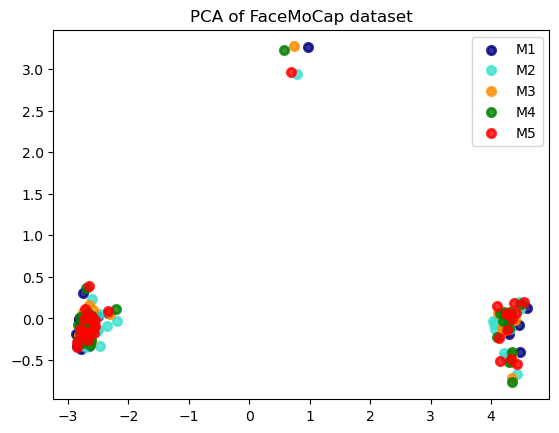

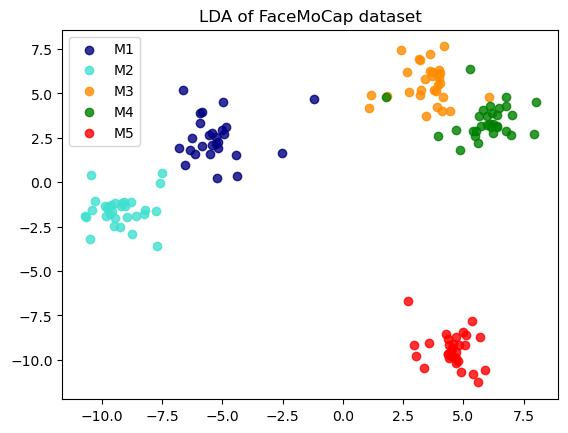

In [34]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t = 249
sel_SPC_summit = sel_SPC[:, t, :]
sel_SPC_summit.shape
X = np.copy(sel_SPC_summit)

m_list = master_df["Move"].tolist()
int_list = list(map(int, m_list))

y = np.array(int_list)
y = y-1

target_names = np.array(["M1", "M2", "M3", "M4", "M5"])

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange", "green", "red"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of FaceMoCap dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of FaceMoCap dataset")

plt.show()

TODO:
* Merge the tutorial file
* Add visualization tools (point cloud dataframe and plots)

# Experimental

In [ ]:
public_df = master_df[['Norm PC', 'Move', 'Status (eyeless)', 'sel points']]
public_df = public_df.rename(columns={"sel points": "Selected points"})

In [13]:
labels = ['M1', 'M2', 'M3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'S1', 'S2', 'S3', 'S4', 'S5', 'G0', 'S6', 'S7', 'S8', 'S9', 'S10', 'D1', 'D2', 'D3', 'D4', 'Ca01', 'Vl1', 'Vl2', 'Vl3', 'Ca02', 'Ca03', 'Vl4', 'Vl5', 'Vl6', 'Ca04', 'N3', 'N4', 'Pln7', 'Pln8', 'Pln9', 'Pln10', 'Pln11', 'R5', 'C02', 'Cms7', 'Cms5', 'Cms3', 'Cms1', 'C01', 'Z5', 'Z4', 'Z3', 'Z2', 'Z1', 'BZ1', 'BZ2', 'BZ3', 'BZ4', 'BZ5', 'Dao1', 'Dao2', 'Dao3', 'B6', 'B5', 'B4', 'B3', 'B2', 'B1', 'Cmi1', 'Cmi3', 'Cmi5', 'H3', 'H1', 'H0', 'M0', 'H6', 'H4', 'Dao4', 'Dao5', 'Dao6', 'B12', 'B11', 'B10', 'B9', 'B8', 'B7', 'BZ6', 'BZ7', 'BZ8', 'BZ9', 'BZ10', 'Z11', 'Z10', 'Z9', 'Z8', 'Z7', 'R2', 'Pln1', 'Pln2', 'Pln3', 'Pln4', 'Pln5', 'N1', 'N2', 'Pps01', 'Lc2', 'Pps02', 'Lc5']

In [5]:
master_df = master_df.drop(columns=['Model-0', 'new pred', 'temp'])
master_df = master_df.rename(columns={"sel points": "Selected points", "Pred-0 PC": "p_ae_s", "Norm PC": "Norm SPC"})
master_df.head()

,Name,Norm SPC,Move,Status (eyeless),p_ae_s,Selected points
0,AA01_M1,"[[1.7564989224519107, 0.6253541802741319, 0.30...",1,clean,,"[[0.5233492437201133, 0.14731857028450931, 0.9..."
1,ABD_M1,"[[1.5398565942838736, 0.5883973510699563, 0.26...",1,missing,"[[1.5398565942838736, 0.5883973510699563, 0.26...","[[0.5723999460910196, 0.15795441902041232, 0.9..."
2,AC_M1,"[[-0.38237177668932, 0.4728121540702672, 0.552...",1,missing,"[[-0.38237177668932, 0.4728121540702672, 0.552...","[[0.5882225036621094, 0.8022400140762329, 0.90..."
3,AD01_M1,"[[1.538563204067707, 0.4405452084387405, 0.478...",1,missing,"[[1.538563204067707, 0.4405452084387405, 0.478...","[[0.5247540707843167, 0.23253715511166786, 0.9..."
4,AF_M1,"[[0.5033656406761701, -1.0511009564520297, 0.3...",1,missing,"[[0.5033656406761701, -1.0511009564520297, 0.3...","[[0.1558455208124025, 0.5632980800388543, 0.94..."


In [15]:
master_df = master_df.rename(columns={"Pred-0 PC": "p_ae_s"})

master_df.head()

,Name,Norm PC,Move,Status (eyeless),p_ae_s,Model-0,new pred,temp,sel points
0,AA01_M1,"[[1.7564989224519107, 0.6253541802741319, 0.30...",1,clean,,[],,,"[[0.5233492437201133, 0.14731857028450931, 0.9..."
1,ABD_M1,"[[1.5398565942838736, 0.5883973510699563, 0.26...",1,missing,"[[1.5398565942838736, 0.5883973510699563, 0.26...",p_ae_s-1,"[[0.60835284, 0.14878011, 0.97314423, 0.703864...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.5723999460910196, 0.15795441902041232, 0.9..."
2,AC_M1,"[[-0.38237177668932, 0.4728121540702672, 0.552...",1,missing,"[[-0.38237177668932, 0.4728121540702672, 0.552...",p_ae_s-1,"[[0.5882225, 0.80224, 0.90069205, 0.46730578, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.5882225036621094, 0.8022400140762329, 0.90..."
3,AD01_M1,"[[1.538563204067707, 0.4405452084387405, 0.478...",1,missing,"[[1.538563204067707, 0.4405452084387405, 0.478...",p_ae_s-1,"[[0.4810073, 0.17637418, 0.9639007, 0.5964561,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.5247540707843167, 0.23253715511166786, 0.9..."
4,AF_M1,"[[0.5033656406761701, -1.0511009564520297, 0.3...",1,missing,"[[0.5033656406761701, -1.0511009564520297, 0.3...",p_ae_s-1,"[[0.24641776, 0.53960973, 0.9418425, 0.3213252...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.1558455208124025, 0.5632980800388543, 0.94..."
